In [1]:
import os
import json
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pylab as plt
from getCitiBikeCSV import getCitiBikeCSV

s = json.load(open("fbb_matplotlibrc.json"))
plt.rcParams.update(s)
%matplotlib inline

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [3]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv').dropna()

---

In [4]:
age = int(datestring[:4]) - df["birth year"]

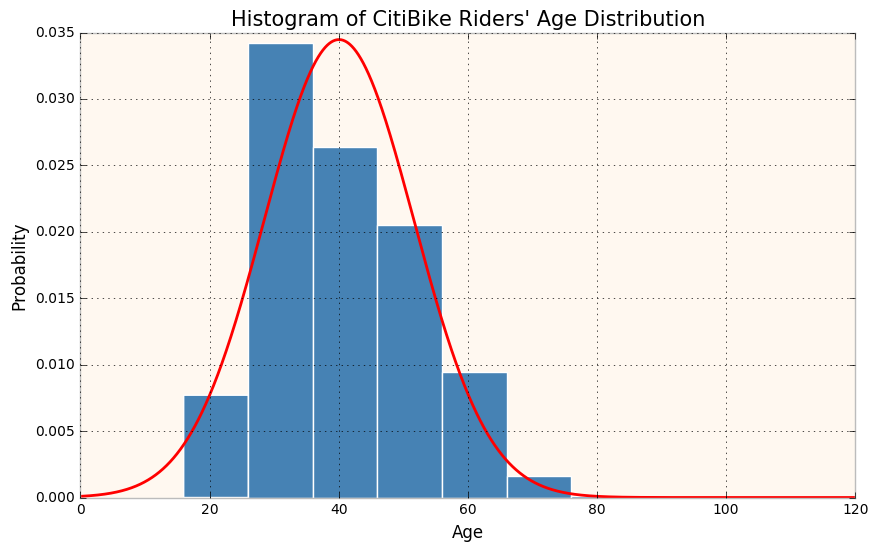

In [5]:
plt.figure(figsize = (10, 6))

plt.hist(age, normed = True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(age))
mu, sigma = norm.fit(age)[:2]
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, c = "r")

plt.title("Histogram of CitiBike Riders' Age Distribution", fontsize = 15)
plt.ylabel("Probability"); plt.xlabel("Age")

plt.show()

</center>*Figure 1: *<center>

### describe in terms of CLT

In [6]:
age_norm = np.random.normal(np.mean(age), np.std(age), len(age))

In [7]:
from scipy.stats import ks_2samp

In [8]:
ks = ks_2samp(age, age_norm)
print (ks)

Ks_2sampResult(statistic=0.088195367313985196, pvalue=0.0)


### From the Kolmogorov–Smirnov test above, since the p-value is much smaller than our significance level of $\alpha = 0.05$, we reject the null hypothesis that the average age of CitiBike riders is normal with mean $\bar{x}_{age}$ and standard deviation $s_{age}$ and accept the alternative hypothesis.

### From the graph above, we suspect that the age of the CitiBike riders might be Poisson-distributed as it resembles the classic descending shape of a Poisson distribution. Therefore we simulate a Poisson distribution with $\lambda=\bar{x}_{age}$ and test it with the Kolmogorov–Smirnov test.

In [9]:
age_pois = np.random.poisson(lam = np.mean(age), size = len(age))

In [10]:
ks2 = ks_2samp(age, age_pois)
print(ks2)

Ks_2sampResult(statistic=0.20659893399637047, pvalue=0.0)


### From the Kolmogorov–Smirnov test above, since the p-value is much smaller than our significance level of $\alpha = 0.05$, we reject the null hypothesis that the average age of CitiBike riders is Poisson with $\lambda=\bar{x}_{age}$ and accept the alternative hypothesis.

---